# Análisis técnico

## AT usando la librería TA-Lib

Esta librería está montada sobre C++, por lo que su instalación requiere pasos adicionales. En Anaconda:

1. Actualizar Anaconda a la última versión: `conda update --force conda`
2. Instalar librería complementaria (en C++): `conda install -c conda-forge libta-lib`
3. Instalar TA-Lib: `conda install -c conda-forge ta-lib`

Más info: [https://pypi.org/project/TA-Lib/](https://pypi.org/project/TA-Lib/)

In [1]:
import pandas as pd
import talib
import yfinance as yf


In [2]:
df = yf.download("TSLA", start = "2022-01-01", end = "2022-12-31")

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

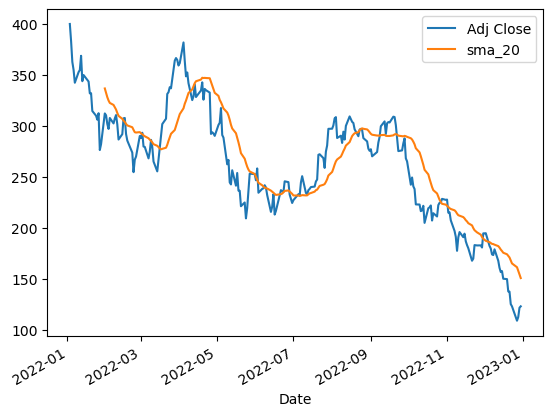

In [3]:
df["sma_20"] = talib.SMA(df["Adj Close"], timeperiod = 20)
df[["Adj Close", "sma_20"]].plot()

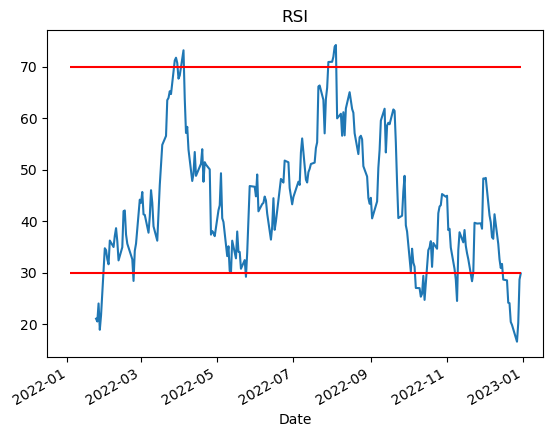

In [4]:
df["RSI"] = talib.RSI(df["Adj Close"])

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df["RSI"].plot(ax = ax, title = "RSI")
ax.hlines(y=30, xmin = df.index.min(), xmax = df.index.max(), color = "red")
ax.hlines(y=70, xmin = df.index.min(), xmax = df.index.max(), color = "red")
plt.show()

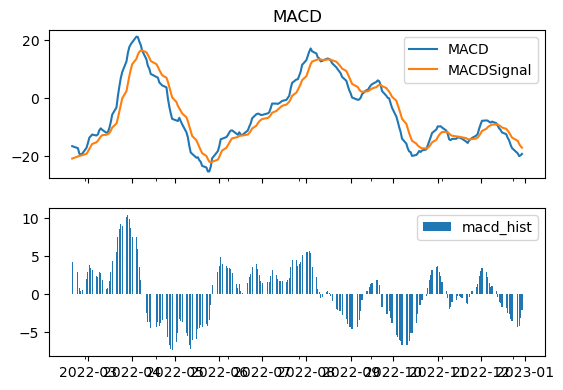

In [5]:
df["MACD"], df["MACDSignal"], df["MACDHist"] = talib.MACD(df["Adj Close"],
                                                          fastperiod = 12,
                                                          slowperiod = 26,
                                                          signalperiod = 9)

fig, ax = plt.subplots(2,1,sharex = True)

df[["MACD", "MACDSignal"]].plot(ax=ax[0], title = "MACD")
ax[1].bar(df.index, df["MACDHist"].values, label = "macd_hist")
ax[1].legend()

## Librería TA

Una versión más liviana es la librería `TA`, aunque tiene menos funcionalidades que `TA-Lib`.

In [7]:
!pip install ta
import ta

df = yf.download("TSLA", start = "2022-01-01", end = "2022-12-31", auto_adjust=True)
df.head()

df2 = ta.add_all_ta_features(df, open = "Open", high = "High", low = "Low", close = "Close", volume = "Volume")
df2.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,9.980810e+07,103931400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,6.219867e+07,3683100,NaN,NaN,-28.528824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.183270,-4.273288,-4.183270
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,-5.167285e+06,-76436700,NaN,NaN,-493.677246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.347121,-5.495390,-9.306707
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,2.280364e+07,-166773300,NaN,NaN,-592.990954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.152337,-2.175838,-11.258732
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,-2.111188e+07,-250938000,NaN,NaN,-82.261913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.544657,-3.609005,-14.404306


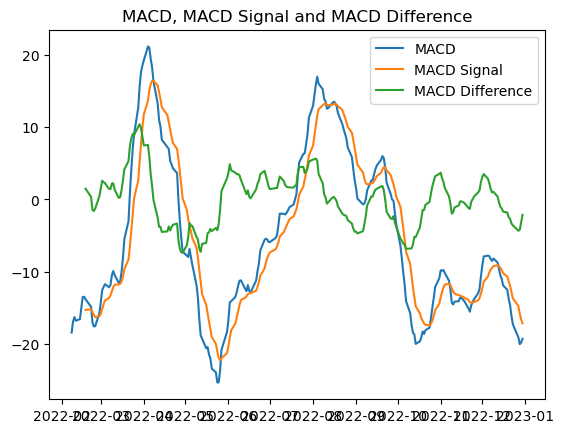

In [8]:
plt.plot(df2.trend_macd, label='MACD')
plt.plot(df2.trend_macd_signal, label='MACD Signal')
plt.plot(df2.trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()